# Strength Level overview stats

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
import datetime
from tkinter import filedialog
import ipywidgets as widgets

pd.options.mode.copy_on_write = True

### Settings

In [7]:
n_top = 10 # Number of exercises to show (sorted by number of sets)

### Import Strength Level CSV

In [2]:
root = tk.Tk()
root.withdraw()
root.call("wm", "attributes", ".", "-topmost", True)
file_path = filedialog.askopenfilename(
    title="Select Strength Level CSV", initialdir=os.getcwd()
)
print("Selected file:")
print(file_path)

Selected file:
/home/niels/Documents/Persoonlijk/Hardlopen en krachttraining/Code/GarLeveltoDO/Input/nelis 2025-06-23 072416.csv


### Import and preprocess dataframe

In [3]:
df_SL = pd.read_csv(file_path, sep=",", header=0, index_col=None)
df_SL["Datetime"] = [
    datetime.datetime.strptime(date, "%Y-%m-%d") for date in df_SL["Date Lifted"]
]
df_SL["Year"] = [item.year for item in df_SL["Datetime"]]


### Summary statistics

In [8]:
n_workouts = len(np.unique(df_SL["Date Lifted"]))
print("Total number of workouts: {}".format(n_workouts))

exercises = np.unique(df_SL["Exercise"])
n_exercises = len(exercises)
print("Number of different exercises performed: {}".format(n_exercises))

date_range = (df_SL["Datetime"].iloc[0] - df_SL["Datetime"].iloc[-1]).days
train_frequency = n_workouts / (date_range / 7)
print("Training frequency: {} workouts per week".format(np.round(train_frequency, 1)))
print(" ")

exercise_count = np.array(
    [
        len(np.unique(df_SL["Date Lifted"][df_SL["Exercise"] == exercise]))
        for exercise in exercises
    ]
)
exercise_sortidx = np.flip(np.argsort(exercise_count))
exercises_sorted = exercises[exercise_sortidx]
exercise_count_sorted = exercise_count[exercise_sortidx]

exercise_sets = np.array(
    [len(df_SL["Date Lifted"][df_SL["Exercise"] == exercise]) for exercise in exercises]
)
exercise_sets_sorted = exercise_sets[exercise_sortidx]

exercise_volume = np.array(
    [
        np.sum(df_SL["Weight (kg)"][df_SL["Exercise"] == exercise])
        for exercise in exercises
    ]
)
exercise_volume_sorted = exercise_volume[exercise_sortidx]

exercise_record = np.array(
    [
        np.max(df_SL["Weight (kg)"][df_SL["Exercise"] == exercise])
        for exercise in exercises
    ]
)
exercise_record_sorted = exercise_record[exercise_sortidx]

exercise_record_bw = (
    exercise_record
    / np.array(
        [
            (
                df_SL["Bodyweight (kg)"][
                    (df_SL["Exercise"] == exercise)
                    & (df_SL["Weight (kg)"] == exercise_record[i])
                ]
            ).min()
            for i, exercise in enumerate(exercises)
        ]
    )
    * 100
)
exercise_record_bw_sorted = exercise_record_bw[exercise_sortidx]

exercise_record_perc = np.array(
    [
        np.max(df_SL["Percentile (%)"][df_SL["Exercise"] == exercise])
        for exercise in exercises
    ]
)
exercise_record_perc_sorted = exercise_record_perc[exercise_sortidx]

print("Top {} most performed exercises: ".format(n_top))
for i, exercise in enumerate(exercises_sorted[:n_top]):
    print(
        "     {}: \n        {} times, \n        {} kg max weight lifted ({}% bodyweight), \n        {} percentile best set, \n        {} sets, \n        {} kg total volume".format(
            exercise,
            exercise_count_sorted[i],
            exercise_record_sorted[i],
            np.round(exercise_record_bw_sorted[i], 1),
            exercise_record_perc_sorted[i],
            exercise_sets_sorted[i],
            np.round(exercise_volume_sorted[i], 1),
        )
    )

Total number of workouts: 292
Number of different exercises performed: 44
Training frequency: 2.4 workouts per week
 
Top 10 most performed exercises: 
     Bench Press: 
        170 times, 
        75.0 kg max weight lifted (97.4% bodyweight), 
        27.3 percentile best set, 
        492 sets, 
        29255.0 kg total volume
     Bent Over Row: 
        123 times, 
        60.0 kg max weight lifted (74.5% bodyweight), 
        24.6 percentile best set, 
        367 sets, 
        16464.5 kg total volume
     Shoulder Press: 
        118 times, 
        55.0 kg max weight lifted (69.0% bodyweight), 
        38.5 percentile best set, 
        306 sets, 
        13295.0 kg total volume
     Pause Squat: 
        116 times, 
        80.0 kg max weight lifted (101.1% bodyweight), 
        7.9 percentile best set, 
        347 sets, 
        20232.5 kg total volume
     Deadlift: 
        102 times, 
        150.0 kg max weight lifted (186.3% bodyweight), 
        53.5 percentile best s

### Progress plot

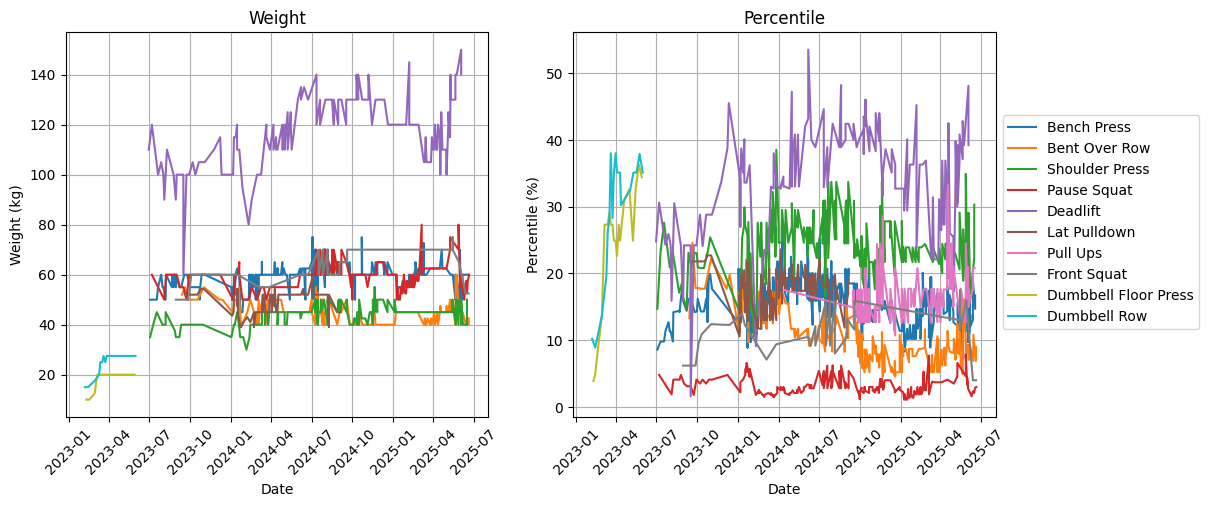

In [9]:
fig, axis = plt.subplots(1,2, figsize=(12,5))

for i, exercise in enumerate(exercises_sorted[:n_top]):
    axis[0].plot(df_SL["Datetime"][df_SL["Exercise"] == exercise], df_SL["Weight (kg)"][df_SL["Exercise"] == exercise])
    axis[1].plot(df_SL["Datetime"][df_SL["Exercise"] == exercise], df_SL["Percentile (%)"][df_SL["Exercise"] == exercise])

axis[0].set_xlabel("Date")
axis[0].set_ylabel("Weight (kg)")
axis[0].set_title("Weight")
axis[0].grid()
axis[0].tick_params(axis='x', labelrotation=45)
axis[1].set_xlabel("Date")
axis[1].set_ylabel("Percentile (%)")
axis[1].set_title("Percentile")
axis[1].grid()
axis[1].tick_params(axis='x', labelrotation=45)
fig.legend(exercises_sorted[:n_top], loc="center left", bbox_to_anchor=(0.9, 0.5))

### Summary per year

In [10]:
years = np.unique(df_SL.loc[:, "Year"])
year_select = widgets.Select(
    options = years,
    value=years[0],
    description="Year to summarise:",
    style={"description_width": "initial"},
)

confirm_button = widgets.Button(description="Confirm", disabled=False)

display(year_select, confirm_button)

def confirm_button_click(a):
    global df_year
    year_selected = year_select.value
    print("Year selected: " + str(year_selected))

    df_year = df_SL.loc[df_SL.loc[:, "Year"] == year_selected, :]

    return(year_selected)

confirm_button.on_click(confirm_button_click)

Select(description='Year to summarise:', options=(np.int64(2023), np.int64(2024), np.int64(2025)), style=Descr…

Button(description='Confirm', style=ButtonStyle())

In [ ]:
n_workouts = len(np.unique(df_year["Date Lifted"]))
print("Total number of workouts: {}".format(n_workouts))

exercises = np.unique(df_year["Exercise"])
n_exercises = len(exercises)
print("Number of different exercises performed: {}".format(n_exercises))

date_range = (df_year["Datetime"].iloc[0] - df_year["Datetime"].iloc[-1]).days
train_frequency = n_workouts / (date_range / 7)
print("Training frequency: {} workouts per week".format(np.round(train_frequency, 1)))
print(" ")

exercise_count = np.array(
    [
        len(np.unique(df_year["Date Lifted"][df_year["Exercise"] == exercise]))
        for exercise in exercises
    ]
)
exercise_sortidx = np.flip(np.argsort(exercise_count))
exercises_sorted = exercises[exercise_sortidx]
exercise_count_sorted = exercise_count[exercise_sortidx]

exercise_sets = np.array(
    [len(df_year["Date Lifted"][df_year["Exercise"] == exercise]) for exercise in exercises]
)
exercise_sets_sorted = exercise_sets[exercise_sortidx]

exercise_volume = np.array(
    [
        np.sum(df_year["Weight (kg)"][df_year["Exercise"] == exercise])
        for exercise in exercises
    ]
)
exercise_volume_sorted = exercise_volume[exercise_sortidx]

exercise_record = np.array(
    [
        np.max(df_year["Weight (kg)"][df_year["Exercise"] == exercise])
        for exercise in exercises
    ]
)
exercise_record_sorted = exercise_record[exercise_sortidx]

exercise_record_bw = (
    exercise_record
    / np.array(
        [
            (
                df_year["Bodyweight (kg)"][
                    (df_year["Exercise"] == exercise)
                    & (df_year["Weight (kg)"] == exercise_record[i])
                ]
            ).min()
            for i, exercise in enumerate(exercises)
        ]
    )
    * 100
)
exercise_record_bw_sorted = exercise_record_bw[exercise_sortidx]

exercise_record_perc = np.array(
    [
        np.max(df_year["Percentile (%)"][df_year["Exercise"] == exercise])
        for exercise in exercises
    ]
)
exercise_record_perc_sorted = exercise_record_perc[exercise_sortidx]

print("Top {} most performed exercises: ".format(n_top))
for i, exercise in enumerate(exercises_sorted[:n_top]):
    print(
        "     {}: \n        {} times, \n        {} kg max weight lifted ({}% bodyweight), \n        {} percentile best set, \n        {} sets, \n        {} kg total volume".format(
            exercise,
            exercise_count_sorted[i],
            exercise_record_sorted[i],
            np.round(exercise_record_bw_sorted[i], 1),
            exercise_record_perc_sorted[i],
            exercise_sets_sorted[i],
            np.round(exercise_volume_sorted[i], 1),
        )
    )

Total number of workouts: 90
Number of different exercises performed: 27
Training frequency: 2.0 workouts per week
 
Top 6 most performed exercises: 
     Bench Press: 
        28 times, 
        60.0 kg max weight lifted (80.0% bodyweight), 
        19.9 percentile best set, 
        30 sets, 
        1675.0 kg total volume
     Deadlift: 
        22 times, 
        120.0 kg max weight lifted (160.0% bodyweight), 
        45.5 percentile best set, 
        23 sets, 
        2330.0 kg total volume
     Dumbbell Floor Press: 
        21 times, 
        20.0 kg max weight lifted (26.7% bodyweight), 
        36.3 percentile best set, 
        21 sets, 
        382.5 kg total volume
     Dumbbell Row: 
        19 times, 
        27.5 kg max weight lifted (36.7% bodyweight), 
        38.0 percentile best set, 
        19 sets, 
        472.5 kg total volume
     Shoulder Press: 
        19 times, 
        45.0 kg max weight lifted (60.0% bodyweight), 
        27.6 percentile best set, 
    